# Visualizing model predictions

For displaying images, we will be using `matplotlib`, which works wonderfully even from within Jupyter Notebook.

In [1]:
import torch
import torchvision
from matplotlib.pyplot import imshow

def show_images(images):
    # Convert grayscale image into RGB channels.
    images = images.expand(-1, 3, -1, -1)
    
    # Make a grid view image of this batch.
    images = torchvision.utils.make_grid(images)
    
    # Unnormalize.
    images = images / 2 + 0.5
    
    # Convert PyTorch tensor to a NumPy array.
    images = images.numpy().transpose([1, 2, 0])
    
    # Display images.
    imshow(images)

Let's fetch 8 images from the test dataset and show them.

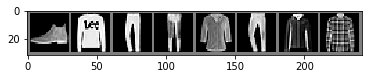

In [2]:
from main import get_data

data_train, data_val, data_test = get_data(batch_size=8, num_workers=0)
inputs, targets = iter(data_test).next()

show_images(inputs)

And the actual labels for each image:

In [3]:
print(targets)

tensor([9, 2, 1, 1, 6, 1, 4, 6])


Oops! The labels are in numbers, of course. They are the label indices, and fortunately, we can find the translated human words from https://github.com/zalandoresearch/fashion-mnist.

In [4]:
LABELS = ('t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot')

print('Truth:\n  ', ' '.join(LABELS[i] for i in targets))

Truth:
   ankle boot pullover trouser trouser shirt trouser coat shirt


## Make predictions with the trained model

First, let's build the model and load the trained state from a checkpoint file.

In [5]:
from main import get_model, load_checkpoint

model = get_model()
load_checkpoint('checkpoints/29.pth', model)

The magic happens here! Run the inputs from the test dataset through the model.

In [6]:
outputs = model(inputs)

print(outputs)

tensor([[29.7212, 18.2632, 26.6118,  ..., -0.7714, -1.4926, -0.2872],
        [32.5628, 13.8593, 50.0357,  ...,  1.2142, -0.3287, -1.0400],
        [47.4349, 81.4266, 40.4236,  ..., -1.4161,  0.2404,  1.7200],
        ...,
        [36.5342, 53.4745, 32.0289,  ..., -0.5849, -0.2114,  2.1639],
        [30.1944, 19.1829, 44.3080,  ...,  1.1572,  0.0380,  1.0208],
        [33.7547, 16.3837, 31.8395,  ...,  1.3180, -0.2662, -0.1007]],
       grad_fn=<ThAddmmBackward>)


Let's pause for a bit; you'll notice that there is a weird `grad_fn` attached to our tensor. That is the place where PyTorch keeps the history for automatic gradient calculation. If you don't need them, you can tell PyTorch so to save up memory:

In [7]:
with torch.no_grad():
    outputs = model(inputs)

print(outputs)

tensor([[29.7212, 18.2632, 26.6118,  ..., -0.7714, -1.4926, -0.2872],
        [32.5628, 13.8593, 50.0357,  ...,  1.2142, -0.3287, -1.0400],
        [47.4349, 81.4266, 40.4236,  ..., -1.4161,  0.2404,  1.7200],
        ...,
        [36.5342, 53.4745, 32.0289,  ..., -0.5849, -0.2114,  2.1639],
        [30.1944, 19.1829, 44.3080,  ...,  1.1572,  0.0380,  1.0208],
        [33.7547, 16.3837, 31.8395,  ...,  1.3180, -0.2662, -0.1007]])


Bye-bye, `grad_fn`!

In the above tensor, each row corresponds to an image, and each column denotes the predicted likelihood for each labels. For our use, we need to get the indices of the column with the highest likelihood, which is easy in PyTorch.

In [8]:
_, predictions = torch.max(outputs, 1)

print(predictions)

tensor([9, 2, 1, 1, 6, 1, 4, 6])


Let's turn those numbers into words!

In [9]:
print('Prediction:\n  ', ' '.join(LABELS[i] for i in predictions))

Prediction:
   ankle boot pullover trouser trouser shirt trouser coat shirt


## All-in-one

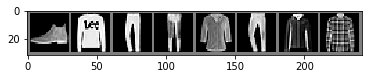

In [10]:
show_images(inputs)

In [11]:
print('Truth:\n  ', ' '.join(LABELS[i] for i in targets))
print('Prediction:\n  ', ' '.join(LABELS[i] for i in predictions))

Truth:
   ankle boot pullover trouser trouser shirt trouser coat shirt
Prediction:
   ankle boot pullover trouser trouser shirt trouser coat shirt
